# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 636


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})
        
    # If an error is experienced, skip the city
    except (ValueError, KeyError):
        print("City not found. Skipping...")
        pass

# Print completion message outside the loop
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kultali
City not found. Skipping...
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | mafra
Processing Record 5 of Set 1 | la passe
Processing Record 6 of Set 1 | bilibino
Processing Record 7 of Set 1 | dunbar
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | sadjoavato
City not found. Skipping...
Processing Record 11 of Set 1 | taiohae
City not found. Skipping...
Processing Record 12 of Set 1 | kayangel
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | margaret river
Processing Record 15 of Set 1 | west island
Processing Record 16 of Set 1 | antalaha
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | newala kisimani
Processing Record 19 of Set 1 | badger
Processing Record 20 of Set 1 | masvingo
Processing Record 21 of Set

In [4]:
print(len(city_data))
# Convert the cities weather data into a Pandas DataFrame
city_data_df =  pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

606


City          606
Lat           606
Lng           606
Max Temp      606
Humidity      606
Cloudiness    606
Wind Speed    606
Country       606
Date          606
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,-12.15,66,20,6.17,CA,1712609284
1,port elizabeth,-33.9180,25.5701,18.39,97,84,4.47,ZA,1712609271
2,mafra,-26.1114,-49.8053,19.29,96,2,0.91,BR,1712609284
3,la passe,45.5549,-0.8967,11.66,80,100,9.42,FR,1712609284
4,bilibino,68.0546,166.4372,-17.51,92,85,1.02,RU,1712609285


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data\cities.csv", index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv("output_data\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,myrina,39.8797,25.0742,285.73,71,20,9.26,GR,1712541312
1,dakhla,23.6848,-15.9580,290.63,86,0,11.30,EH,1712541101
2,yalvac,38.2956,31.1778,279.41,64,98,2.07,TR,1712541314
3,port elizabeth,-33.9180,25.5701,292.09,93,0,7.20,ZA,1712541047
4,anadyr,64.7500,177.4833,259.43,84,40,6.00,RU,1712541046


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

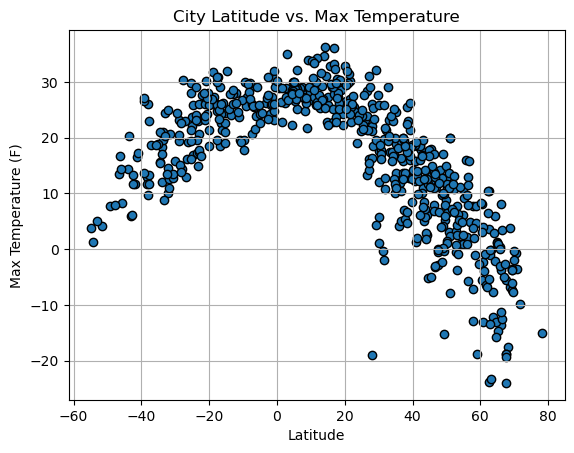

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Set the title and labels
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Incorporate other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

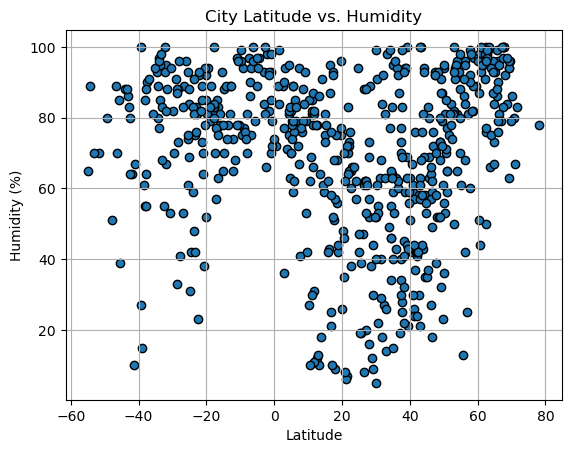

In [9]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Set the title and labels
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Incorporate other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data\Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

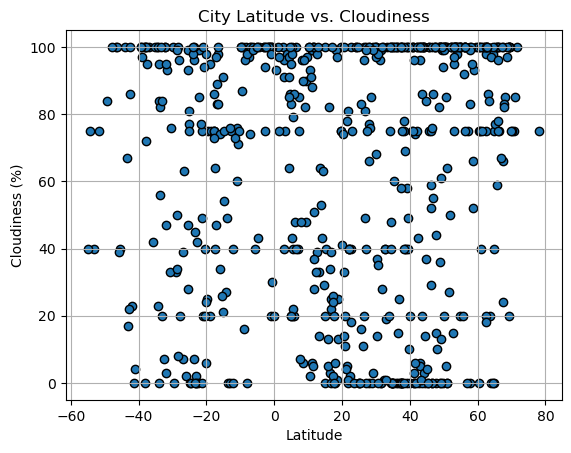

In [10]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Set the title and labels
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Incorporate other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data\Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

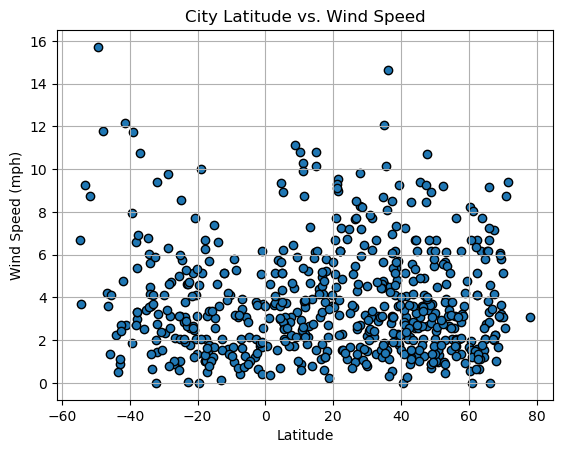

In [11]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Set the title and labels
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Incorporate other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data\Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate regression line
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create scatter plot
    plt.scatter(x_values, y_values)

    # Plot regression line
    plt.plot(x_values, regress_values, "r-")

    # Annotate regression line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")

    # Set labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Show correlation coefficient
    print(f"The r-squared is: {rvalue**2}")

    # Show plot
    plt.show()

In [14]:
# Filter data for cities in the Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,-12.15,66,20,6.17,CA,1712609284
3,la passe,45.5549,-0.8967,11.66,80,100,9.42,FR,1712609284
4,bilibino,68.0546,166.4372,-17.51,92,85,1.02,RU,1712609285
5,dunbar,38.3606,-81.7374,25.59,45,75,4.12,US,1712609285
7,tiksi,71.6872,128.8694,-9.78,83,100,9.40,RU,1712608836


In [15]:
# Filter data for cities in the Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,port elizabeth,-33.9180,25.5701,18.39,97,84,4.47,ZA,1712609271
2,mafra,-26.1114,-49.8053,19.29,96,2,0.91,BR,1712609284
6,grytviken,-54.2811,-36.5092,1.36,89,75,3.68,GS,1712609285
9,puerto natales,-51.7236,-72.4875,4.25,70,75,8.75,CL,1712608810
10,margaret river,-33.9500,115.0667,12.03,77,0,5.62,AU,1712609286


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7338734335863034


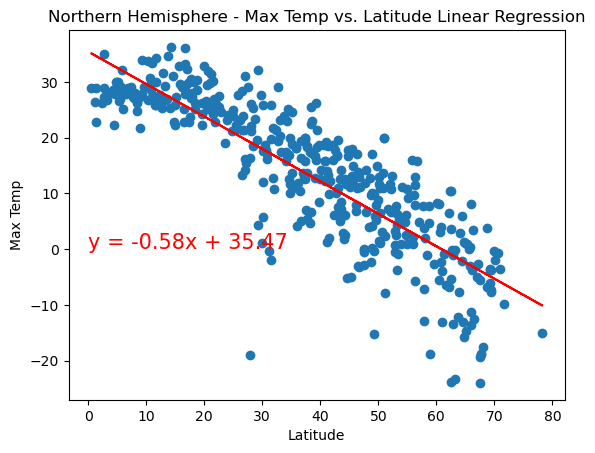

In [16]:
# Perform linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Latitude", "Max Temp", "Northern Hemisphere - Max Temp vs. Latitude Linear Regression", (0, 0))

The r-squared is: 0.5371735075004235


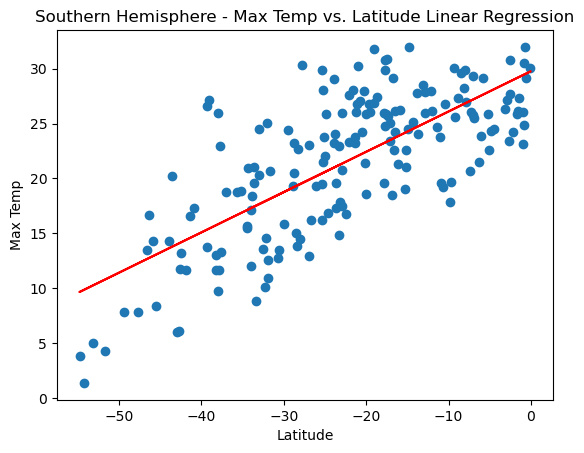

In [26]:
# Perform linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Latitude", "Max Temp", "Southern Hemisphere - Max Temp vs. Latitude Linear Regression", (-30, 50))

**Discussion about the linear relationship:**
##1.-NorthernHemisphere: the regression shows that for every degree that the latitude of the Northern Hemisphere increases, the temperature decreases 0.58 degrees and that the temperature in theory in the lattitude 0 is 35.47 degrees, it also shows that there is a relationship between latitude and temperature.
##2.-Both graphs show that the closer we get to the Equator the temperatures are higher and the closer we get to the poles the temperature is colder, however in both the dispersion of the data shows that there are other variables that influence the temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.06724650262487919


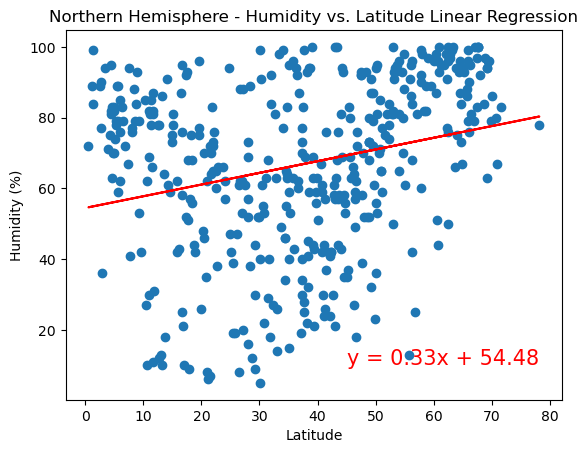

In [18]:
# Perform linear regression on Northern Hemisphere for humidity vs. latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the plot_linear_regression function
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Northern Hemisphere - Humidity vs. Latitude Linear Regression", (45, 10))

The r-squared is: 0.062498486972055754


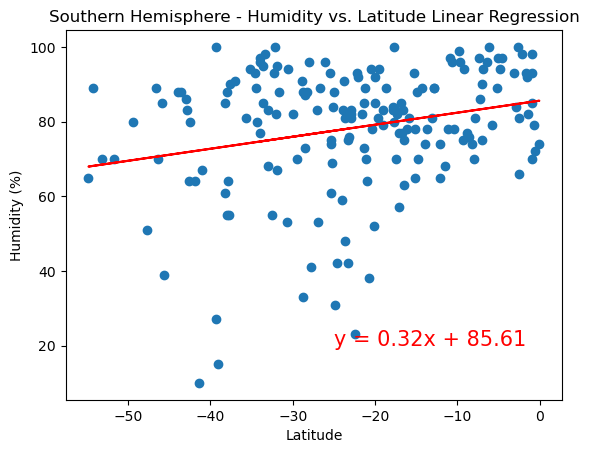

In [21]:
# Perform linear regression on Southern Hemisphere for humidity vs. latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the plot_linear_regression function
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Southern Hemisphere - Humidity vs. Latitude Linear Regression", (-25, 20))

**Discussion about the linear relationship:**

#Northern Hemisphere; The regression shows that for every degree that the latitude increases, the humidity increases 0.33%, in theory the humidity when the latitude is 0 is 54.48%.
#southern hemisphere the regression shows that for every degree you get closer to the equator the humidity increases 32%, when the latitude is 0 in the southern hemisphere theoretically the humidity is 85.61%.

##Both graphs show a certain correlation, however the dispersion of the data shows that there are other variables that better explain the humidity variations.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.029660116498478977


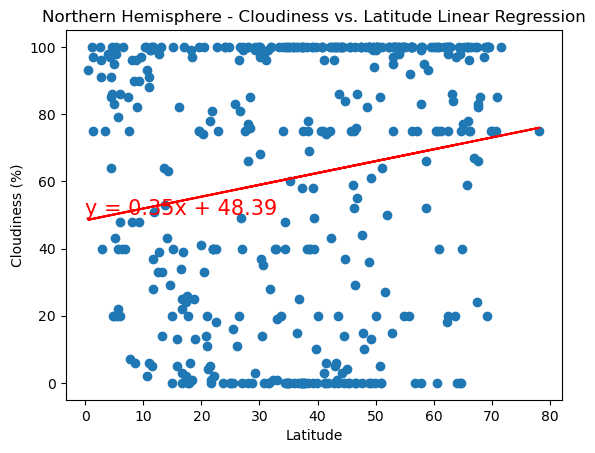

In [22]:
# Perform linear regression on Northern Hemisphere for cloudiness vs. latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the plot_linear_regression function
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression", (0, 50))

The r-squared is: 0.01237506430241667


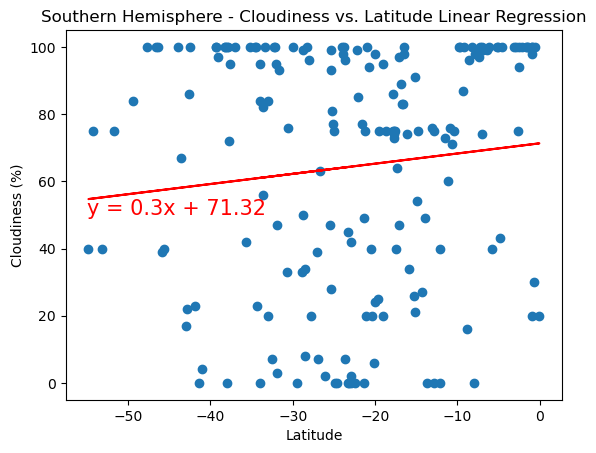

In [23]:
# Perform linear regression on Southern Hemisphere for cloudiness vs. latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the plot_linear_regression function
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression", (-55, 50))

**Discussion about the linear relationship:** 

#northernhemisfeiro: the regression shows that for every degree moving north the cloudiness increases 0.35% and that in theory the cloudiness when the latitude is 0 is 48.39%

#Southern Hemisphere: for every degree they get closer to the Equator, cloudiness increases 3% and temporarily cloudiness when the latitude is 0 is 71.32%.

##Both graphs will show that the relationship between cloudiness and latitude is not very strong since the data have a high degree of dispersion.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0077377812012533465


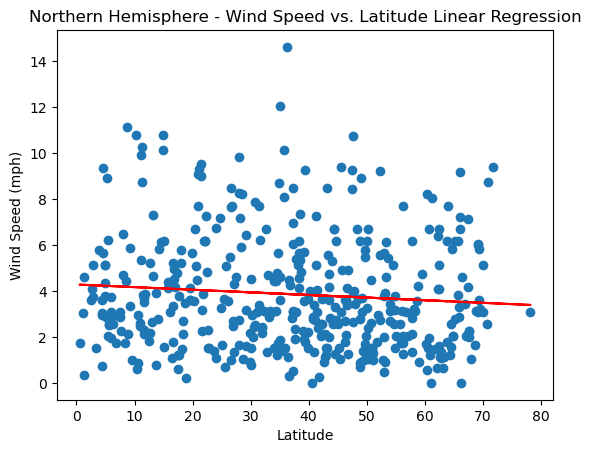

In [24]:
# Perform linear regression on Northern Hemisphere for wind speed vs. latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the plot_linear_regression function
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression", (0, 25))

The r-squared is: 0.12188107084390395


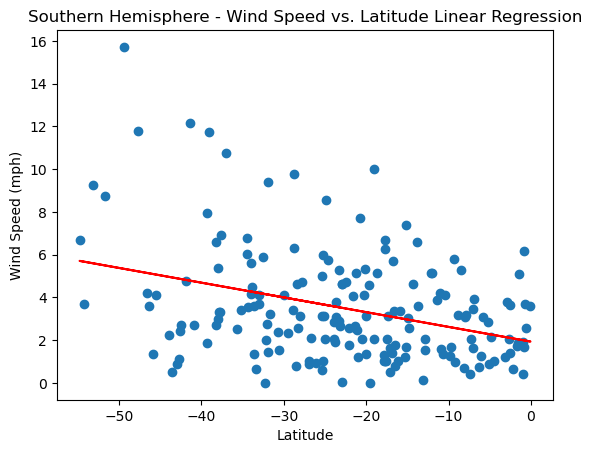

In [25]:
# Perform linear regression on Southern Hemisphere for wind speed vs. latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the plot_linear_regression function
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression", (-55, 20))

**Discussion about the linear relationship:** 

###northernhemisfeiro: the regression line is almost horizontal which suggests that there is no strong relationship between wind speed and latitude

#Southern Hemisphere: in the case of the southern hemisphere there is a slight relationship between latitude and wind speed, it shows that the wind speed decreases as it approaches the Ecuador.

#Both graphs show dispersion in their data so there are other variables that better explain the wind speed.